# Homework (18 pts) - PCA & Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
%config InlineBackend.figure_format = 'retina'
plt.style.use('bmh')
plt.rcParams['lines.markeredgecolor'] = 'w'
plt.rcParams['lines.markeredgewidth'] = 0.5
plt.rcParams['figure.figsize'] = [15, 6]

# file is in the same folder as this notebook
EEGs = np.load("EEGs.npy")

# [channel, time, trial]
EEGs.shape

(64, 640, 99)

---
1. (3 pts) From the EEG data above, generate the average EEG across trials for each channel. Plot the result for channel index 20.

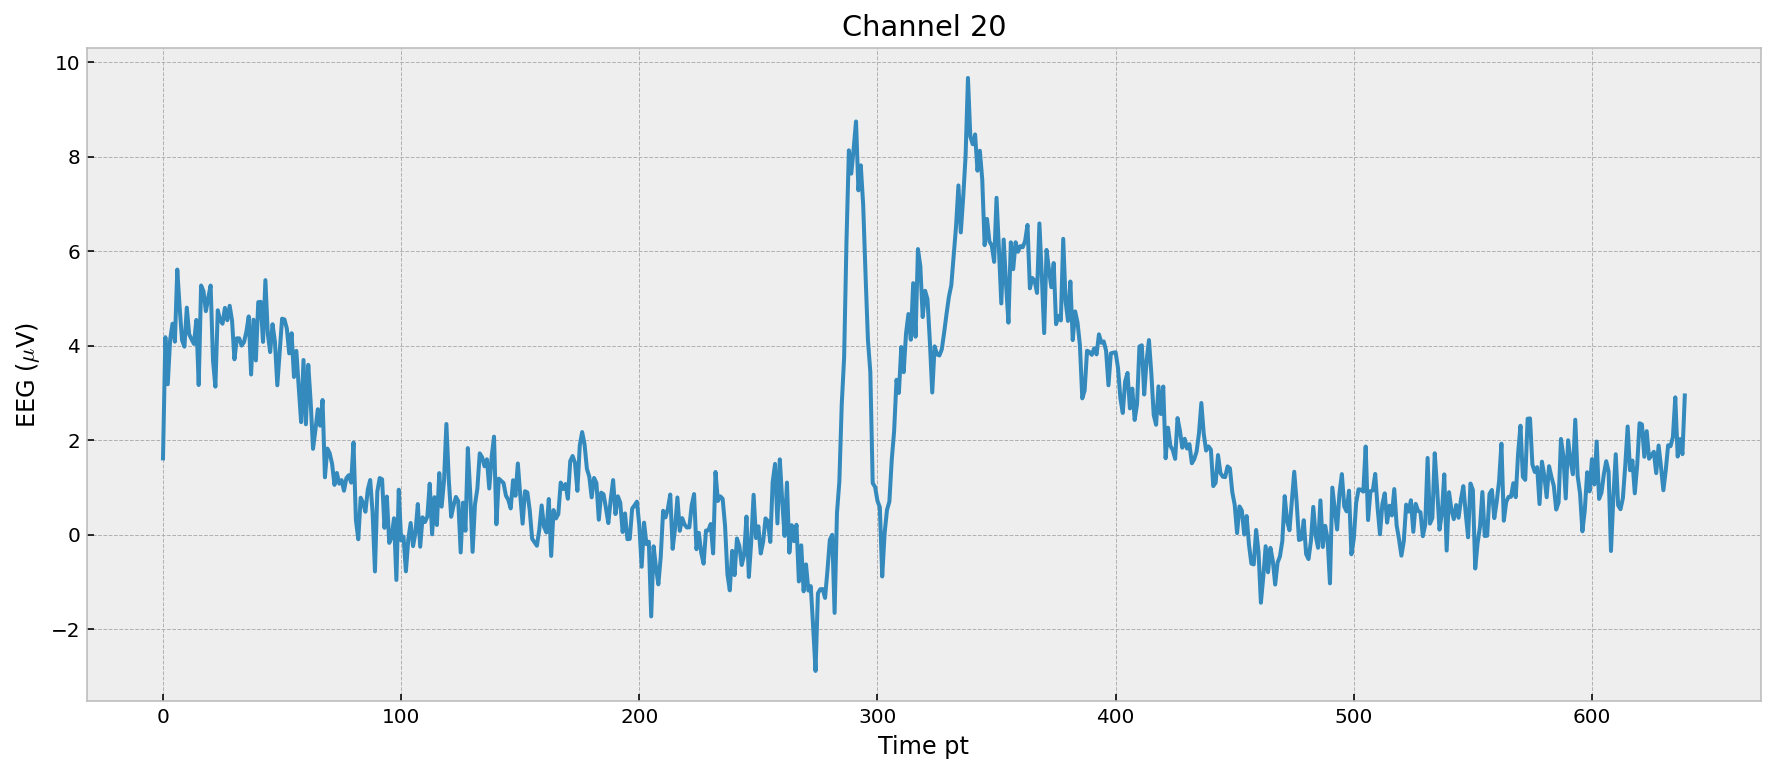

In [3]:
avgEEGs = EEGs.mean(axis=2)

plt.plot(avgEEGs[20])
plt.xlabel('Time pt')
plt.ylabel('EEG ($\mu$V)')
plt.title('Channel 20');

---
2. (3 pts) Apply PCA to the averaged EEGs from #1 above. Use as many principal components (PCs) as needed to explain 90% of the variance in the average EEG waveforms. Report the number of PCs used and plot each PC as if it were an EEG waveform itself.

The number of PCs needed to explain 90% of the variance in the EEGs is 4.


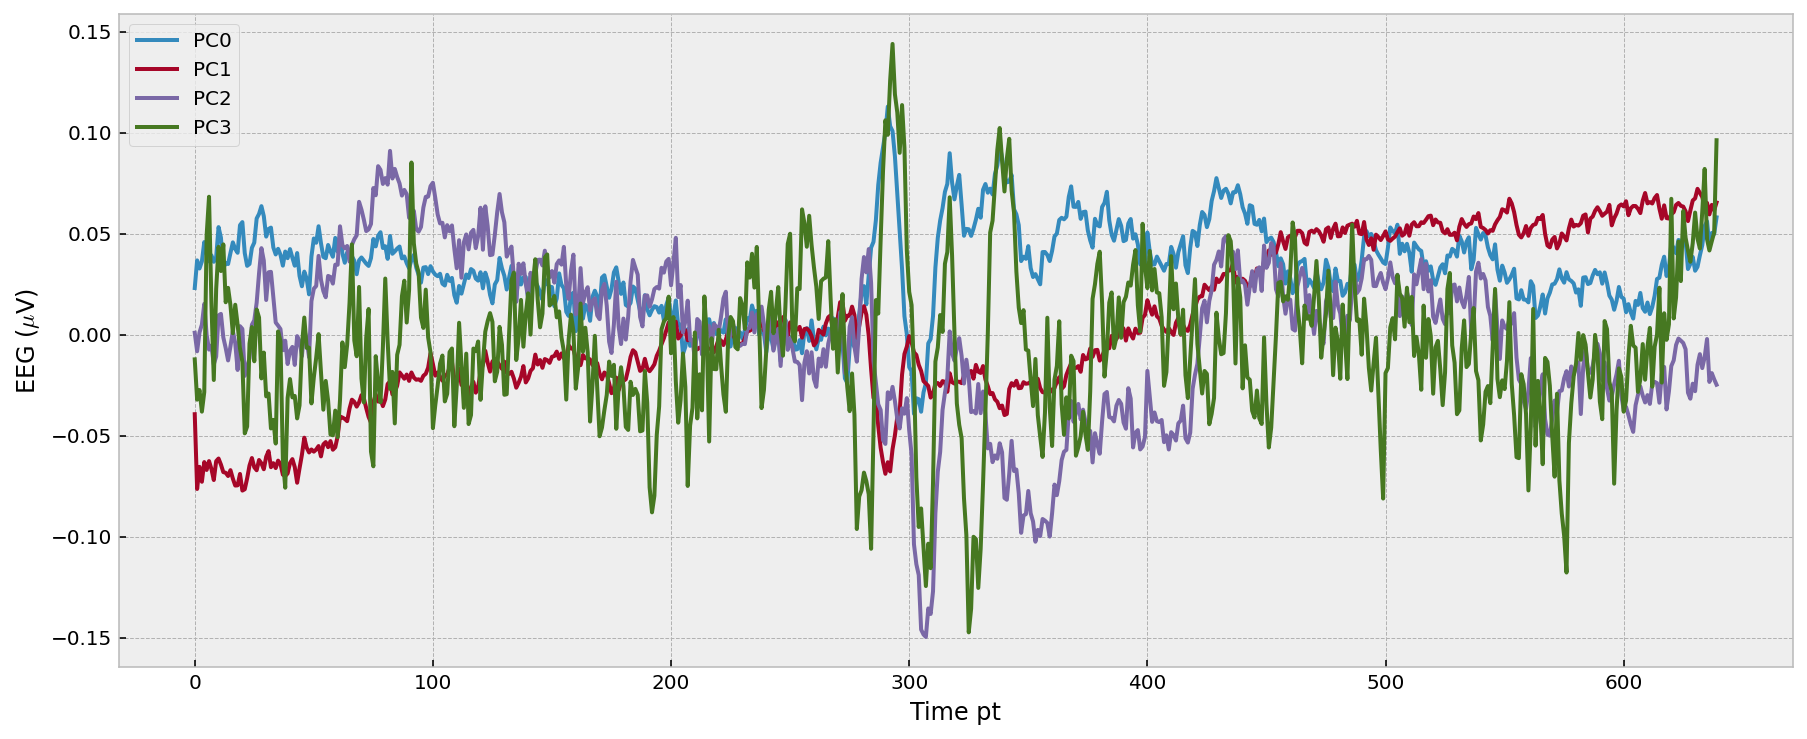

In [5]:
from sklearn.decomposition import PCA

pca = PCA(0.9)
pca.fit(avgEEGs)
n = pca.n_components_
print(f'The number of PCs needed to explain 90% of the variance in the EEGs is {n}.')

for i in range(n):
    plt.plot(pca.components_[i,:], label=f'PC{i}')
plt.xlabel('Time pt')
plt.ylabel('EEG ($\mu$V)')
plt.legend();

---
3. (3 pts) Replot the average EEG for channel 20 as in #1 above, and additionally overlay the plot of its projection onto the principal components from #2 above. Use a legend to label the plots as 'original' and 'projected'. Does it look like we lost a lot of information by describing each waveform using only a small number of PCs as opposed to explicit values at each time point?

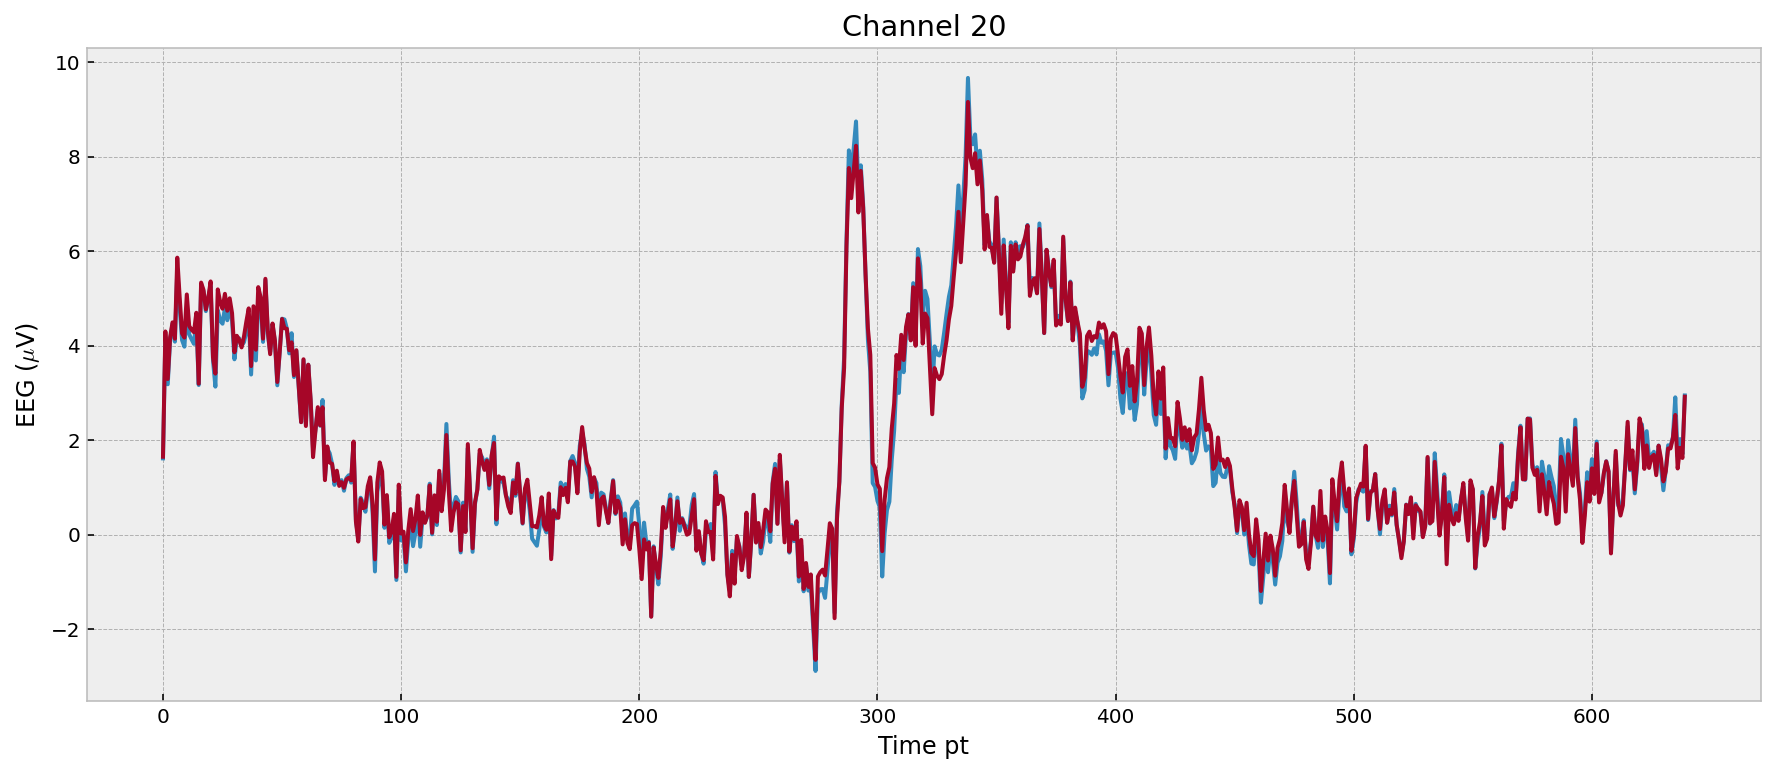

In [16]:
avgEEGs_pca = pca.transform(avgEEGs)
avgEEGs_projected = pca.inverse_transform(avgEEGs_pca);

plt.plot(avgEEGs[20], label='original')
plt.plot(avgEEGs_projected[20], label='projected')
plt.xlabel('Time pt')
plt.ylabel('EEG ($\mu$V)')
plt.title('Channel 20');

Very little information appears to have been lost using only four principal components to describe the entire EEG waveform.

---
4. (3 pts) How much of each of the principal component waveforms were mixed together to generate the projection for channel 20 as shown in #3 above? Plot the relative amounts of each principal component as a bar graph.

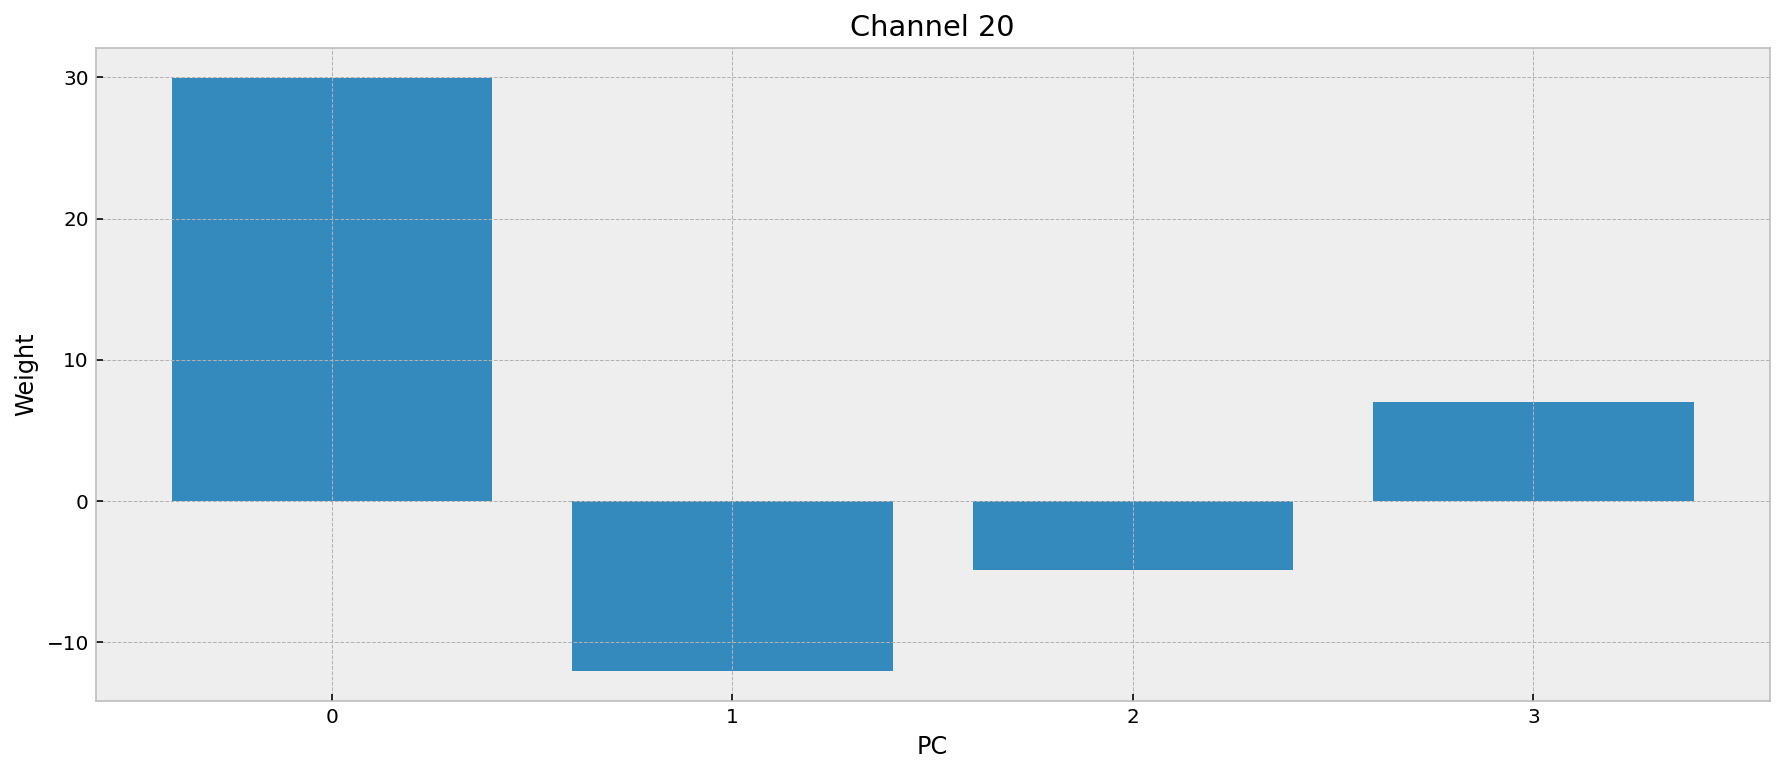

In [7]:
plt.bar(range(n), avgEEGs_pca[20])
plt.xticks(range(n))
plt.xlabel('PC')
plt.ylabel('Weight')
plt.title('Channel 20');

---
5. (3 pts) Use a Gaussian mixture model (GMM) to group the average EEG waveforms into clusters in the PCA reduced dimensions. Use the silhouette score to determine the optimal number of clusters from 2-10. Plot the EEG waveforms as points in the first three PCA reduced dimensions (axes are the PCs) colored according to their cluster.

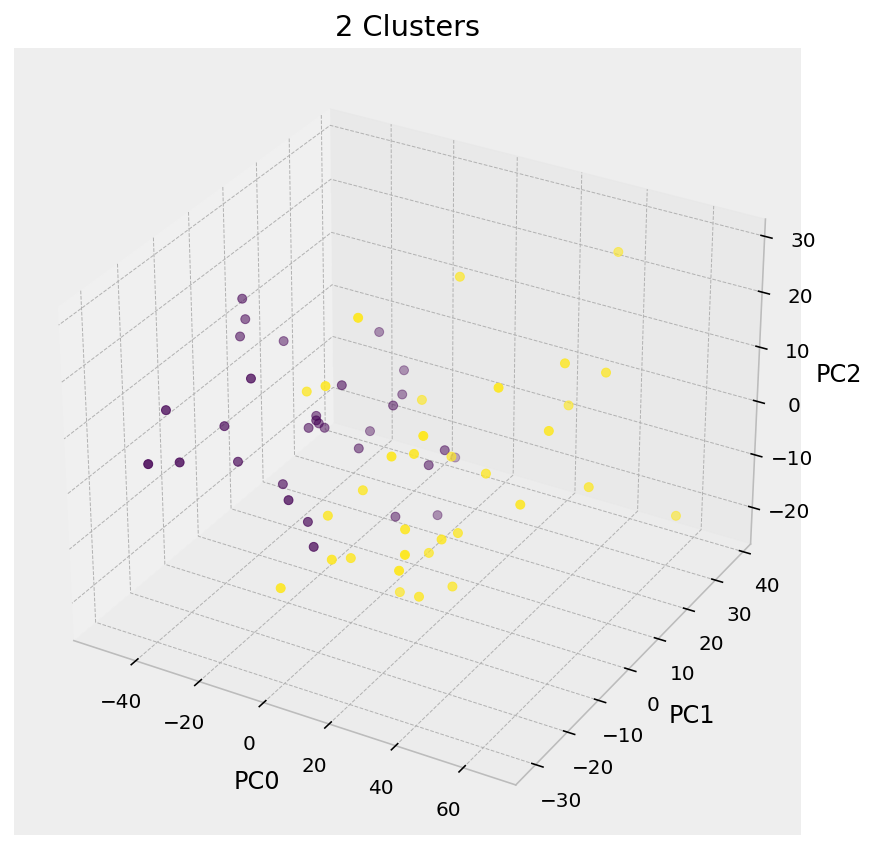

In [15]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

X = avgEEGs_pca
num_clusters = np.arange(2, 11)
scores = np.zeros(num_clusters.shape)
for i, n in enumerate(num_clusters):
    model = GaussianMixture(n_components=n)
    labels = model.fit_predict(X)
    scores[i] = silhouette_score(X, labels)

n = num_clusters[np.argmax(scores)]
model = GaussianMixture(n_components=n)
labels = model.fit_predict(X)

ax = plt.subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=labels)
ax.set_xlabel('PC0')
ax.set_ylabel('PC1')
ax.set_zlabel('PC2')
plt.title(f'{n} Clusters')
plt.tight_layout();

---
6. (3 pts) For each of the clusters from #5 above, plot the cluster-averaged EEG. Overlay all EEGs on the same axes and denote their cluster id with a legend.

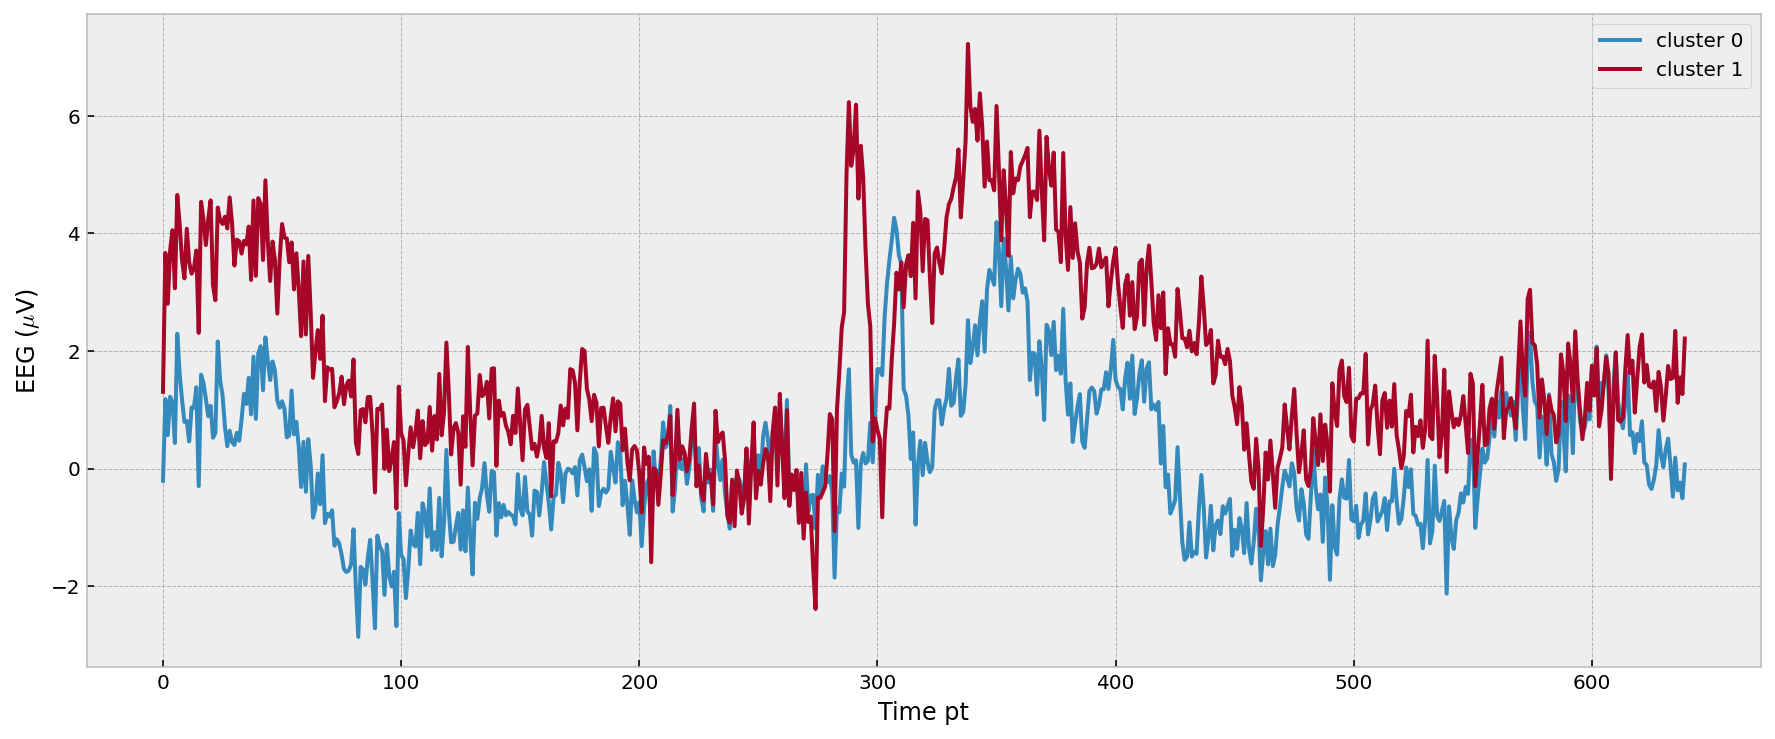

In [19]:
for i in range(n):
    plt.plot(avgEEGs_projected[labels == i].mean(axis=0), label=f'cluster {i}')
plt.xlabel('Time pt')
plt.ylabel('EEG ($\mu$V)')
plt.legend();